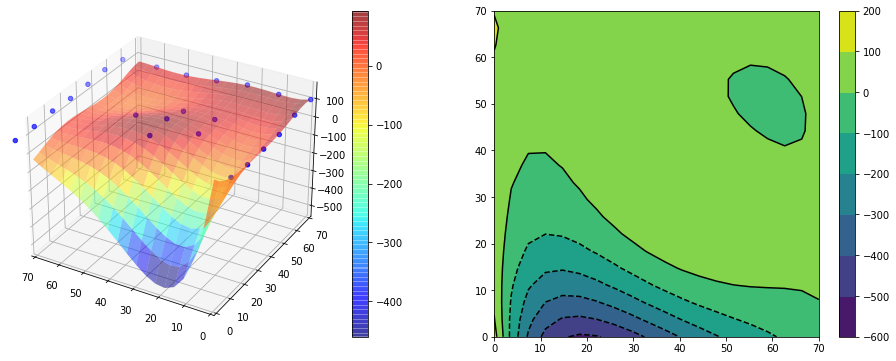

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# The training set
datapoints = np.array([
    [12.5,70,81.32], [25,70,88.54], [37.5,70,67.58], [50,70,55.32], 
    [62.5,70,56.84], [77,70,49.52], [0,11.5,71.32], [77,57.5,67.20], 
    [0,23,58.54], [25,46,51.32], [37.5,46,49.52], [0,34.5,63.22], 
    [25,34.5,48.32], [37.5,34.5,82.30], [50,34.5,56.42], [77,34.5,48.32], 
    [37.5,23,67.32], [0,46,64.20], [77,11.5,41.89], [77,46,55.54], 
    [77,23,52.22], [0,57.5,93.72], [0,70,98.20], [77,0,42.32]
    ])
X = datapoints[:,0:2]
Y = datapoints[:,-1]
# 5 degree polynomial features
deg_of_poly = 5
poly = PolynomialFeatures(degree=deg_of_poly)
X_ = poly.fit_transform(X)
# Fit linear model
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

# The test set, or plotting set
N = 20
Length = 70
predict_x0, predict_x1 = np.meshgrid(np.linspace(0, Length, N), 
                                     np.linspace(0, Length, N))
predict_x = np.concatenate((predict_x0.reshape(-1, 1), 
                            predict_x1.reshape(-1, 1)), 
                           axis=1)
predict_x_ = poly.fit_transform(predict_x)
predict_y = clf.predict(predict_x_)

# Plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape), 
                        rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax1.scatter(datapoints[:, 0], datapoints[:, 1], datapoints[:, 2], c='b', marker='o')

ax1.set_xlim((70, 0))
ax1.set_ylim((0, 70))
fig.colorbar(surf, ax=ax1)
ax2 = fig.add_subplot(122)
cs = ax2.contourf(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape))
ax2.contour(cs, colors='k')
fig.colorbar(cs, ax=ax2)
plt.show()